In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/Titanic-Dataset.csv


# TITANIC SURVIVAL PREDICTION USING DIFFERENT ML MODELS
**Through this project I aim to compare the performance metrics of different ML algorithms on the titanic dataset. The different ML models used for comparison are as follows**
1. **Logistic Regression**
2. **Decision Trees**
3. **Random Forests**

The plan of action is as follows:
1. **DATA CLEANING**
2. **EXPLORATORY DATA ANALYSIS**
3. **FEATURE ENGINEERING**
4. **MODEL TRAINING AND EVALUATION**
5. **COMPARISON OF EVALUATION METRICS AMONGST DIFFERENT MODELS**



In [43]:
## LOADING THE DATASET AND GETTING AN OVERVIEW OF THE DATA
df=pd.read_csv('/kaggle/input/titanic/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.shape

(891, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
## CHECKING FOR NULL VALUES
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
## REMOVING THE CABIN COLUMN FROM THE DATASET AS IT IS INSIGNIFICANT AND CONTAINS MANY NULL VALUES
df.drop('Cabin',axis=1,inplace=True)

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [49]:
age_median=df.Age.median()
print(age_median)

28.0


In [50]:
df['Age']=df['Age'].fillna(age_median)

In [51]:
df['Age'].isnull().sum()

0

In [52]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [53]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [54]:
df['Embarked']=df['Embarked'].fillna('S')

In [55]:
## CHECKING FOR DUPLICATED ROWS
df.duplicated().sum()

0

In [56]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1


In [57]:
## EDA TO FIND OUT FACTORS ACTUALLY AFFECTING THE SURVIVAL 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize'],
      dtype='object')

/tmp/ipykernel_36/2664561346.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'],hist=False)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/2664561346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level f

<Axes: xlabel='Age', ylabel='Density'>

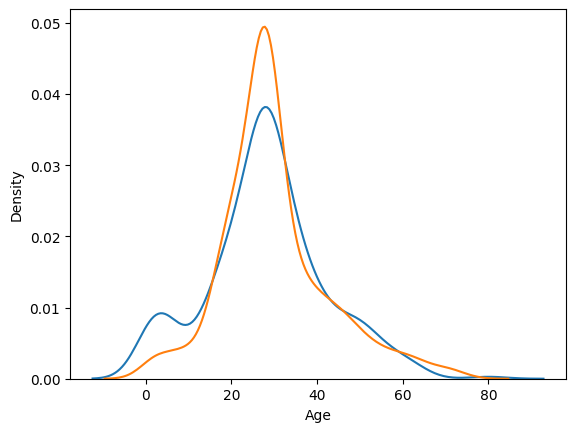

In [58]:
## AGE DISTRIBUTION OF THOSE WHO SURVIVED AND THOSE WHO DIDN'T
sns.distplot(df[df['Survived']==1]['Age'],hist=False)
sns.distplot(df[df['Survived']==0]['Age'],hist=False)


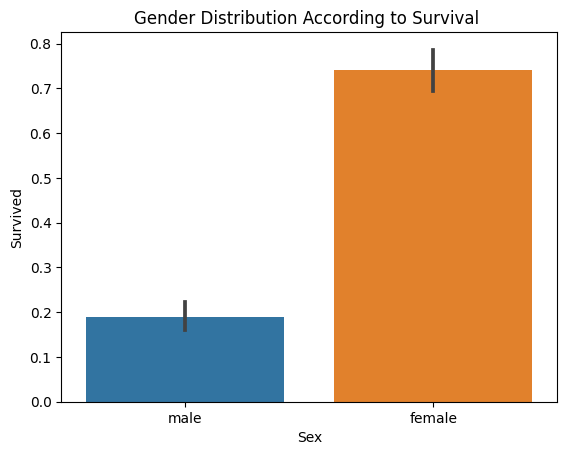

In [59]:
## SURVIVAL BY GENDER
sns.barplot(x="Sex", y="Survived", data=df)
plt.title('Gender Distribution According to Survival ')
plt.show()

More no of females survived as compared to men

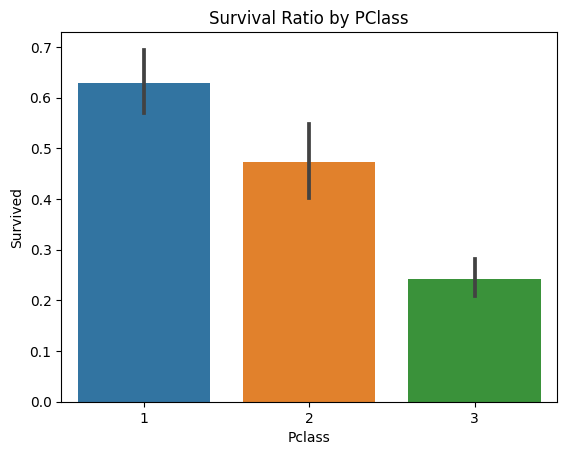

In [60]:
## SURVIVAL BY PCLASS
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title('Survival Ratio by PClass')
plt.show()

The survival rate of passengers travelling in Class 1 is the highest and that of Class 3 is the lowest.

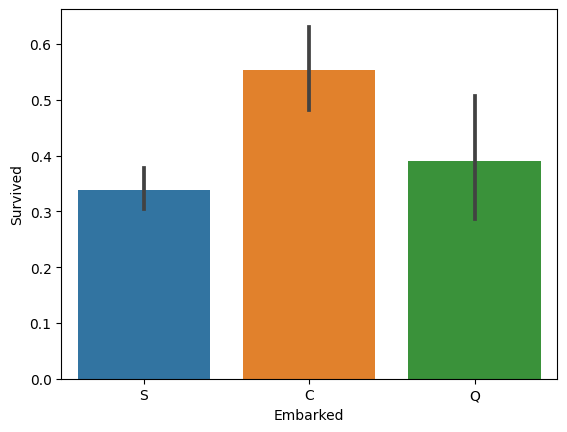

In [61]:
## SURVIVAL BY EMBARKED
sns.barplot(x="Embarked", y="Survived", data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


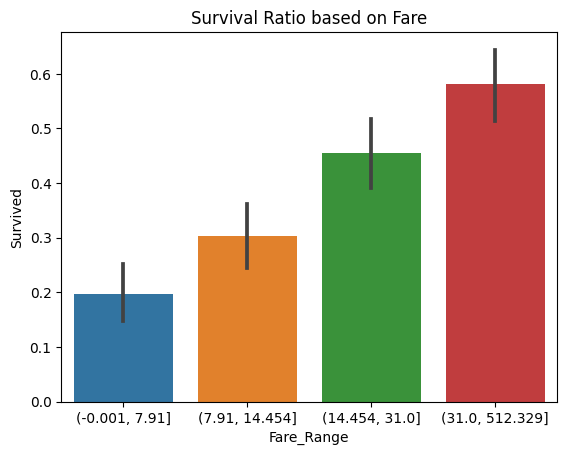

In [62]:
## SURVVIAL BY FARE
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
ax=sns.barplot(data=df,x='Fare_Range',y='Survived')
plt.title('Survival Ratio based on Fare')
plt.show()

The passengers who paid higher fare had higher chance of survival.

<Axes: xlabel='FamilySize', ylabel='Survived'>

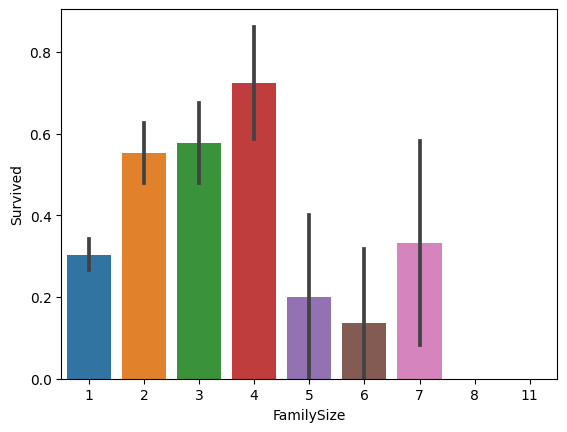

In [63]:
sns.barplot(x="FamilySize", y="Survived", data=df)

**Passengers with very large families had lower survival chances (harder to escape).**

**Passengers with small families had better chances than those traveling alone.**

In [64]:
## CORRELATION OF NUMERIC FEATURES
columns = []
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        columns.append(col)
columns

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'FamilySize']

In [65]:
columns.remove('PassengerId')

In [66]:
columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']

In [67]:
df[columns].corr()["Survived"].sort_values(ascending=False)


Survived      1.000000
Fare          0.257307
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
Age          -0.064910
Pclass       -0.338481
Name: Survived, dtype: float64

In [68]:
pd.crosstab(df["Sex"], df["Pclass"], values=df["Survived"], aggfunc="mean")


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Females in 1st class had highest survival, males in 3rd had lowest.”

**The survival of passenger primarily depends upon the following features:**
1. Fare
2. Age
3. Gender
4. PClass
5. Embarked
6. FamilySize


In [69]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'Fare_Range'],
      dtype='object')

In [70]:
df.Sex=df.Sex.map({'male':1,'female':2})

In [71]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [72]:
## DATA IS READY FOR ML MODELS

X=df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Fare_Range'],axis=1)
X.columns              ## INPUT FEATURES

Index(['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [73]:
y=df['Survived']   ## TARGET FEATURE

In [74]:
## COMPARING DIFFERENT MODELS BY THERE PERFORMANCE METRICS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=4,ccp_alpha=0.01),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })


results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.804469   0.782609  0.729730  0.755245  0.877091
1        Decision Tree  0.798883   0.796875  0.689189  0.739130  0.796203
2        Random Forest  0.815642   0.780822  0.770270  0.775510  0.892600


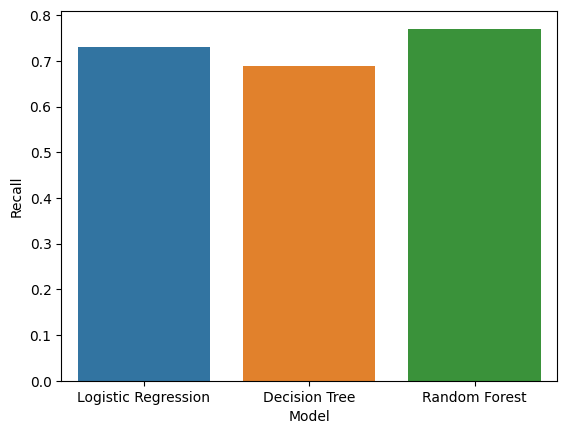

In [75]:
## RECALL COMPARISON OF DIFFERENT MODELS
sns.barplot(x="Model", y="Recall", data=results_df)
plt.show()

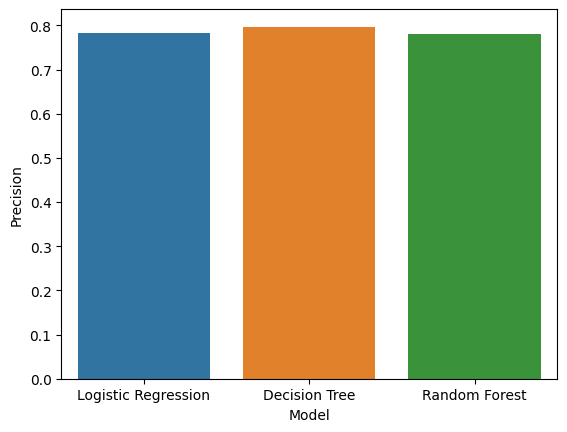

In [76]:
## PRECISION COMPARISON OF DIFFERENT MODELS
sns.barplot(x="Model", y="Precision", data=results_df)
plt.show()

In our case the metrics **Precision** and **Recall** cater to our needs well and should be given more importance . But first we must understand how we can interpret these terms
* **Precision-** Tells us out of predicted survivors, how many really survived.
* **Recall-**  Tells us out of all real survivors, how many we correctly predicted.
- These parameters give us a better measure of the model's efficiency because they show a picture of survivors.

1. Out of all the models **Random Tree** performs the best and gives the highest recall value.
2. Out of all the models **Decision Tree** performs the best and gives the highest precision value.

In [77]:
## FEATURE IMPORTANCES - THE FEATURES WHICH MODEL THINKS ARE IMPORTANT
rf = RandomForestClassifier()
rf.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances

Pclass        0.082351
Sex           0.272823
Age           0.258610
Fare          0.276452
FamilySize    0.079202
Embarked_Q    0.008809
Embarked_S    0.021753
dtype: float64

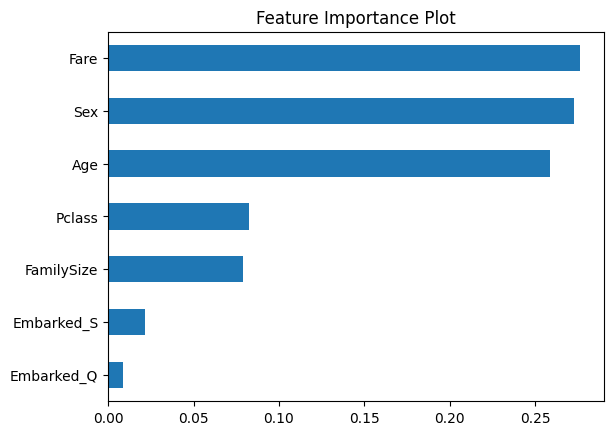

In [78]:
importances.sort_values().plot(kind="barh")
plt.title('Feature Importance Plot')
plt.show()

**The most important features for prediction and data modelling are as follows**
1. Sex
2. Fare
3. Age

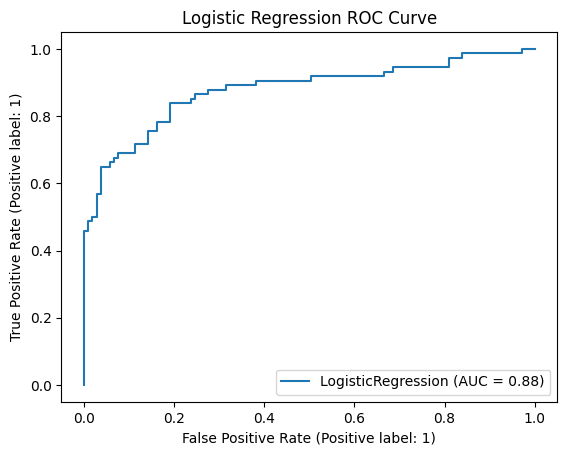

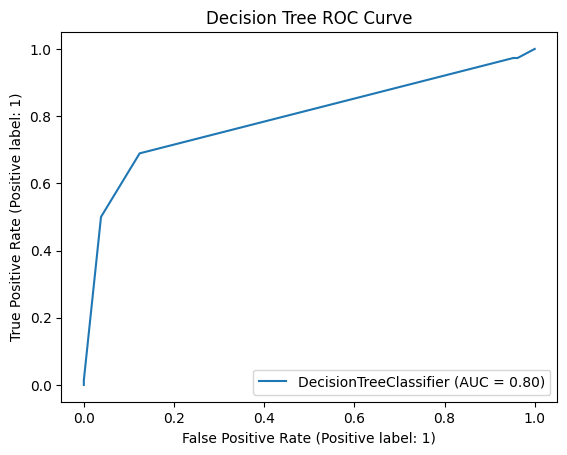

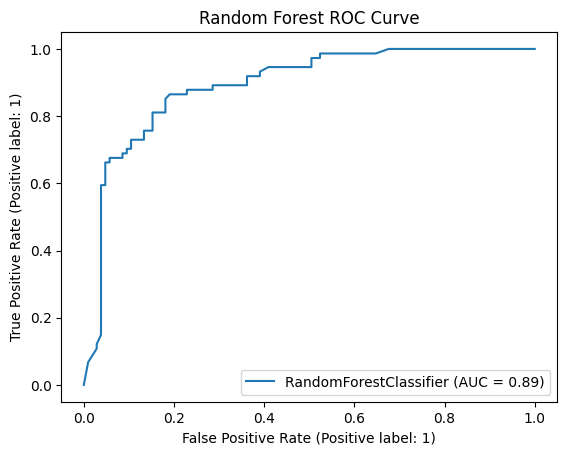

In [79]:
from sklearn.metrics import RocCurveDisplay
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'{name} ROC Curve')
plt.show()

**ROC = Receiver Operating Characteristic curve**

It shows how well our model can separate the two classes (e.g. Survived vs Not Survived).
* **X-axis = False Positive Rate (FPR)**
- Out of non-survivors, how many did we wrongly predict as survivors?
* **Y-axis = True Positive Rate (TPR) = Recall**
-Out of real survivors, how many did we correctly predict as survivors?

**AUC=Area Under Curve**
- AUC is the probability that the model ranks a random survivor higher than a random non-survivor.
- It’s a single number that summarizes how good the ROC curve is.
- It ranges between 0 and 1 , larger the value of AUC better is the classification result

## CONCLUSION
* In our dataset **Random Forest Algorithm** gives the highest value of AUC and also performs well on precision and recall metrics hence it is best suited for data modelling and making accurate  predictions about survival.
* **Random Forest Algorithm** shows less bias and variance thereby avoiding overfitting making the overall prediction accurate and trustworthy.